In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

PCA = Find New Axes Where Data Varies the Most

PCA is a Dimensionality Reduction technique.It transforms high-dimensional data into fewer dimensions while retaining maximum variance.

In [48]:
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}

# Convert dictionary into pandas dataframe
df = pd.DataFrame(data)
print("Original Data:\n", df)

Original Data:
    Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [49]:
#  Separate features (X) and label (y)
X = df.drop('Gender', axis=1) # Features: Height, Weight, Age
y = df['Gender']  # Target: Gender

# StandardScaler scales data so each feature has mean = 0 and variance = 1
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [50]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Check how much variance is captured by these 2 components
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)
print("Sum of Variance Captured:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.94041611 0.04378473]
Sum of Variance Captured: 0.9842008396200406


In [51]:
# Split the reduced data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_pca,y, test_size=0.3, random_state=42)

# Train Logistic Regression on reduced data
model = LogisticRegression()
model.fit(x_train,y_train)     # train the model
y_pred = model.predict(x_test) # make prediction

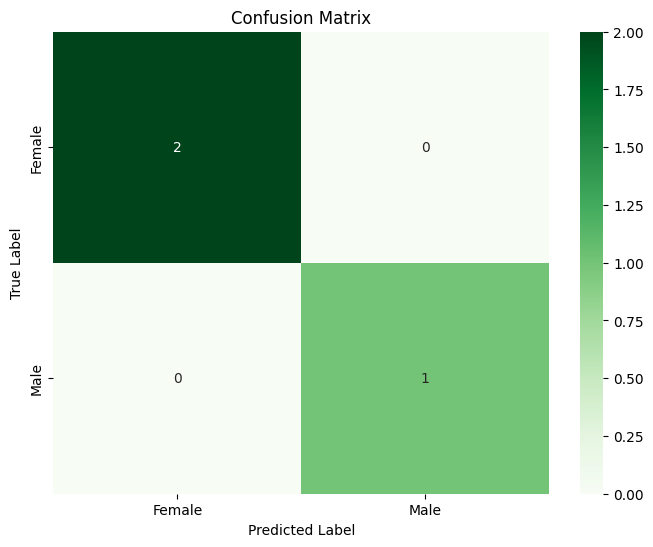

In [52]:
# Generate confusion matrix to evaluate the model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap= 'Greens', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

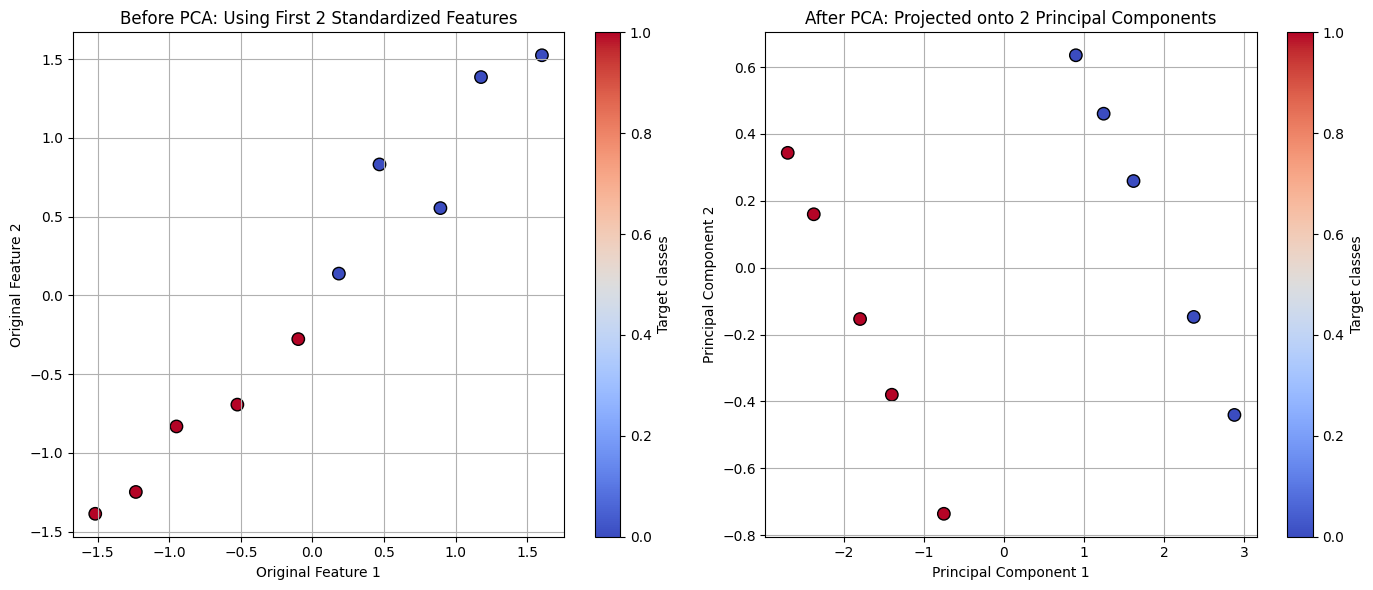

In [53]:
y_num = pd.factorize(y)[0]
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(x_scaled[:,0], x_scaled[:,1] , c=y_num , cmap='coolwarm', edgecolor='k',s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_num , cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.grid(True)
plt.show()

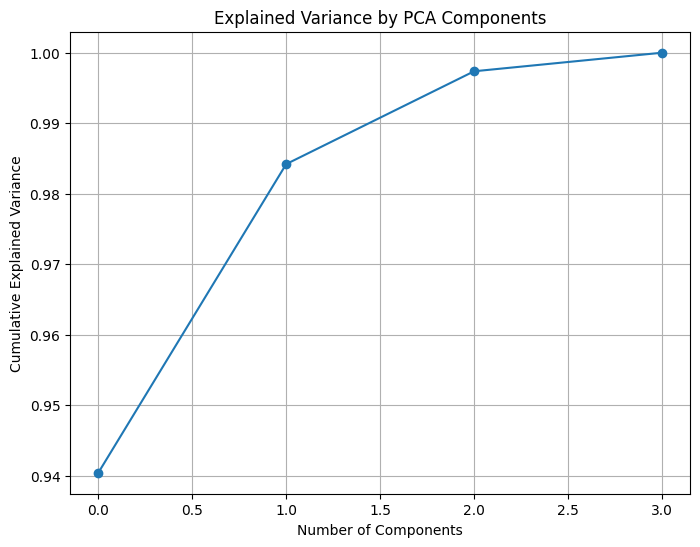

In [54]:
# Plot to see how much variance is captured by each principal component
pca_full = PCA().fit(x_scaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

This figure shows how many components are enough to capture ~90-95% variance.
